# Node and Link analysis: Centrality measures

Centrality measures are used to estimate the "importance" of the elements of the network. The problem is that "importance"

* is not well-defined,
* depends on the domain of the network

During this seminar we will consider two node centrality measures: degree centrality and closeness centrality

### Degree Centrality

You have already met the degree centrality in this course.

Given adjacency matrix $A$ of an unweighted and undirected graph $G=(V,E)$ on $n$ nodes, degree centrality of node $v_i$ is computed as:

$$ c_d(v_i)=\displaystyle\sum_jA_{ji}.$$

In order to compare nodes across graphs this measure can be normalized by a factor $\frac{1}{n−1}$.

### Closeness Centrality

Closeness centrality is used to identify nodes that can reach other nodes quickly. It is defined as follows:

$$ c_c(v_i)= \frac{1}{\displaystyle\sum_{j \neq i}d(v_i,v_j)},$$

where $d(v_i,v_j)$ is the length of a shortest path between $v_i$ and $v_j$. Again, it is normalized by a multiplicative coefficient $n−1$.

## Why?

Centralities allow us to

* Understand the structure of the graph without looking at it
* Compare nodes of a graph (between graphs) and identify the most "important"
* Compare graphs

## Example: Zachary's karate club

Let us dive in this first example. It is a small graph which allows us to draw graphic representations of it. First, we load our favourite libraries.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Now we load the graph and fix its layout for future representations.

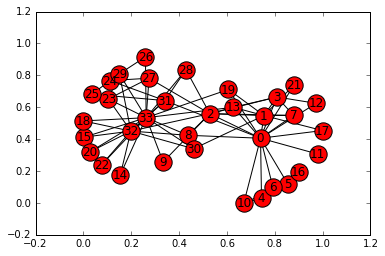

In [2]:
K = nx.karate_club_graph()
pos = nx.spring_layout(K)
nx.draw_networkx(K,pos)

### Degree centrality

Let us compute the degree centrality throuhg NetworkX function and change the size (and color) of each node accordingly.

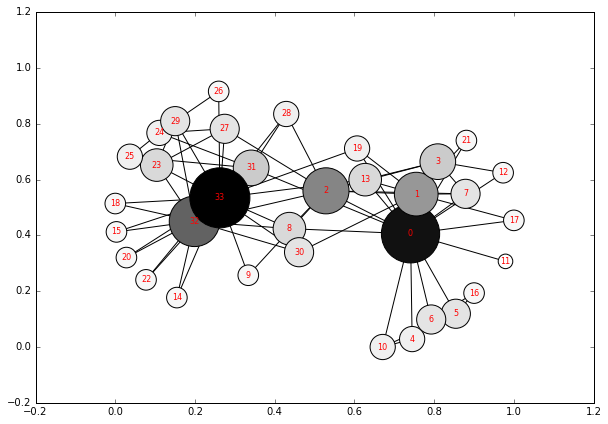

In [3]:
# Degree centrality
dc = nx.degree_centrality(K)
plt.figure(1, figsize=(10,7))
nx.draw_networkx(K,
          pos,
          nodelist=dc.keys(),
          node_size = [d*7000 for d in dc.values()],
          node_color=list(dc.values()),
          font_size=8,
          font_color='red',
          cmap=plt.cm.Greys,
          )

We may observe that nodes 0 and 33 are the most "important" with respect to degree centrality.

### Closeness centrality

Let us now do the same thing with the other measure.

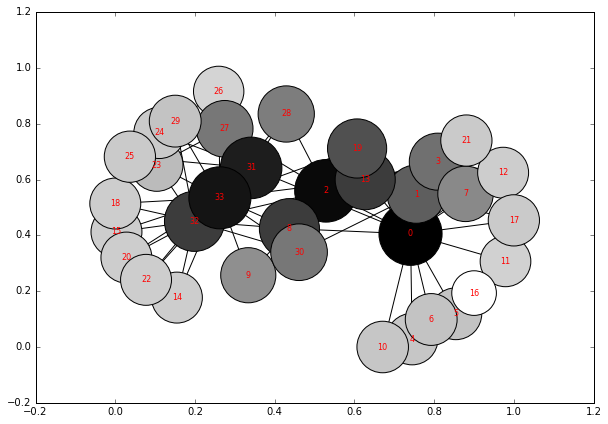

In [4]:
# Closeness centrality
cc = nx.closeness_centrality(K)
plt.figure(1, figsize=(10,7))
nx.draw_networkx(K,
          pos,
          nodelist=cc.keys(),
          node_size = [c*7000 for c in cc.values()],
          node_color=list(cc.values()),
          font_size=8,
          font_color='red',
          cmap=plt.cm.Greys,
          )

Closeness centrality bring more nodes into the "important" bucket! 

### Closeness versus Degree

Let us plot degree vs closeness centralities.

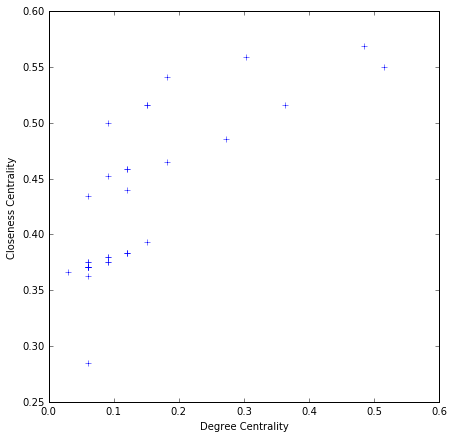

In [5]:
# Plot closeness vs degree centralities
xdata = list(dc.values())
ydata = list(cc.values())
plt.figure(1, figsize=(7,7))
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')
p=plt.plot(xdata,ydata, '+')

If we want some better understanding, we may print the labels of each node.

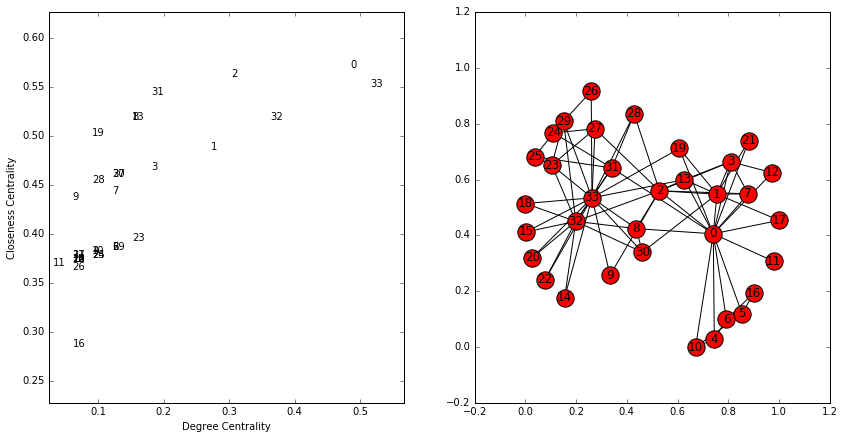

In [6]:
# Adding labels for nodes.

fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(121)
for v in range(len(dc)):
   ax1.text(x = xdata[v], y = ydata[v], s=str(v))
ax1.set_xlim(0.8 * min(xdata), 1.1 * max(xdata))
ax1.set_ylim(0.8 * min(ydata), 1.1 * max(ydata))
ax1.set_xlabel('Degree Centrality')
ax1.set_ylabel('Closeness Centrality')

ax2 = fig.add_subplot(122)
ax2 = nx.draw_networkx(K, pos)

In this example, the span of degree centrality is

In [7]:
# Span of degree centrality (aka xdata)
max(xdata)-min(xdata)

0.48484848484848486

While the span of closeness centrality is 

In [8]:
# Span of closeness centrality (aka ydata)
max(ydata)-min(ydata)

0.28448275862068967

For that reason, closeness centrality tends to make important vertices less bright (in this example). Is it a common situation? We shall inquire about it later.

For now, let us make another observation... Let us just draw the identity function on the plot.

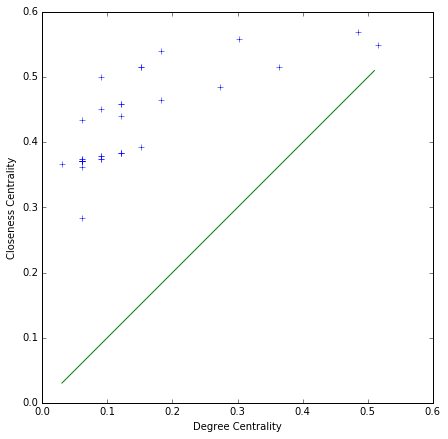

In [9]:
# Plot closeness vs degree centralities with an added line!
xdata = list(dc.values())
ydata = list(cc.values())
plt.figure(1, figsize=(7,7))
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')
p=plt.plot(xdata,ydata, '+')
x=np.arange(min(xdata),max(xdata),0.01)
p=plt.plot(x,x)

One may observe that the closeness centrality is always greater than the degree centrality. Is it a common feature of these measures or is it due to the small size of this example?

### Looking for evidence

Let us build a database of graphs through our Erdős-Renyi generator with several values for $p$.


In [10]:
#Building a list of graphs
GD=[]
for p in np.arange(0.1,1,.05):
    for i in range(5):
        G=nx.gnp_random_graph(100,p)
        Comp=list(nx.connected_components(G))
        H=G.subgraph(Comp[0])
        GD.append(H)

Let us see if our second guess is satisfied by those graphs.

In [11]:
#Checking one graph at a time
def check_cc_greater_dc(G):
    dc=nx.degree_centrality(G)
    cc=nx.closeness_centrality(G)
    return all([cc[v] > dc[v] for v in G.nodes()])
    
all([check_cc_greater_dc(G) for G in GD]) # This might take a while, try to predict the result!

False

If you are unlucky, you may still think that our observation is valid... In that case, hopefully your neighbour will have a counter-example for you.

Now let us investigate that the span seems to be smaller for closeness centrality than for degree centrality. We shall plot the span of both measures for our graphs (we also draw the identity function for a easier reading).

In [12]:
def span_centralities(G):
    dc=list(nx.degree_centrality(G).values())
    cc=list(nx.closeness_centrality(G).values())
    return([max(dc)-min(dc),max(cc)-min(cc)])

def plot_span_vs(L):
    sd=[]
    sc=[]
    for G in L:
        [a,b] = span_centralities(G)
        sd.append(a)
        sc.append(b)
    plt.xlabel('degree centrality span')
    plt.ylabel('closeness centrality span')
    plt.plot(sd,sc,'+')
    t=np.arange(min(sd),max(sd),0.01)
    plt.plot(t,t)

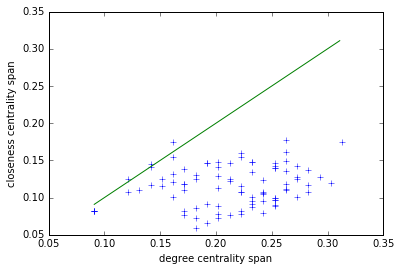

In [13]:
plot_span_vs(GD) # Once again, this might take a while. Any guess?

Does it make sense ?